# PHQ ANALYSIS
### Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, during the winter season compared to other seasons?
- winter: December, January, February
- spring: March, April, May
- summer: June, July, August
- fall: September, October, November

> ### Does age affect the total score over the seasons?
> ### Does gender affect the total score over the seasons?
> ### Does time of day (morning, midday, or evening) affect the total score over the seasons?

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#creating dataframe from dataset (.csv) file and displaying the first 5 rows
path = 'PHQ9 data.csv'
original_df = pd.read_csv(path)
#displaying head of df
original_df.head()

,Unnamed: 0,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,...,q14,q16,q46,q47,happiness.score,time,period.name,start.time,phq.day,id
0,1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,0.0,NaN,NaN,NaN,2,2017-01-22 20:11:59,evening,2017-01-09 07:22:37,-0.951921,1
1,2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,1.0,NaN,3,2017-02-08 22:53:06,evening,2017-01-09 07:22:37,16.159965,1
2,3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3,2017-02-08 08:00:46,morning,2017-01-09 07:22:37,15.540289,1
3,4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,1.0,NaN,NaN,2,2017-01-22 14:01:25,midday,2017-01-09 07:22:37,-1.209259,1
4,5,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2,2017-01-21 15:37:24,midday,2017-01-09 07:22:37,-2.142604,1


In [84]:
#dropping repeated columns and columns not related to our analysis
dropped_df = original_df.drop(columns=['Unnamed: 0', 'id', 'phq.day', 'start.time', 
                                       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47', 'happiness.score'])
#displaying head of df
dropped_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,age,sex,time,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-22 20:11:59,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-02-08 22:53:06,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-02-08 08:00:46,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-22 14:01:25,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-21 15:37:24,midday


In [85]:
#creating empty lists to append information to then add as columns to new df
total_scores = []
depression_severity = []
season = []
#looping through dropped_df
for index, row in dropped_df.iterrows():
    #calculating total score for each row and appending to the total_scores list
    total_score = row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9']
    total_scores.append(total_score)
    
    #determining depression severity based on the total score and appending to the depression_severity list
    if pd.isna(total_score):
        depression_severity.append(np.nan)
    elif total_score <= 4:
        depression_severity.append('minimal')
    elif total_score <= 9:
        depression_severity.append('mild')
    elif total_score <= 14:
        depression_severity.append('moderate')
    elif total_score <= 19:
        depression_severity.append('moderately severe')
    else:
        depression_severity.append('severe')
    
    #finding the season based on the time column in dropped_df and appending the season to the season list
    date = row['time'].split()
    year_month_day = date[0].split('-')
    if year_month_day[1] == '12' or  year_month_day[1] == '01' or year_month_day[1] == '02':
        season.append('winter')
    elif year_month_day[1] == '03' or  year_month_day[1] == '04' or year_month_day[1] == '05':
        season.append('spring')
    elif year_month_day[1] == '06' or  year_month_day[1] == '07' or year_month_day[1] == '08':
        season.append('summer')
    else: 
        season.append('fall')
#creating a new df for the column additions
total_scores_df = dropped_df
#adding a total.score, depression.severity, and season column to total_scores_df
total_scores_df['total.score'] = total_scores
total_scores_df['depression.severity'] = depression_severity
total_scores_df['season'] = season
#reordering columns for readability
total_scores_df = total_scores_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,14,15,10,11,12,16,13]]
#displaying head of new df
total_scores_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,total.score,depression.severity,age,sex,time,season,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-22 20:11:59,winter,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-02-08 22:53:06,winter,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-02-08 08:00:46,winter,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-22 14:01:25,winter,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-21 15:37:24,winter,midday


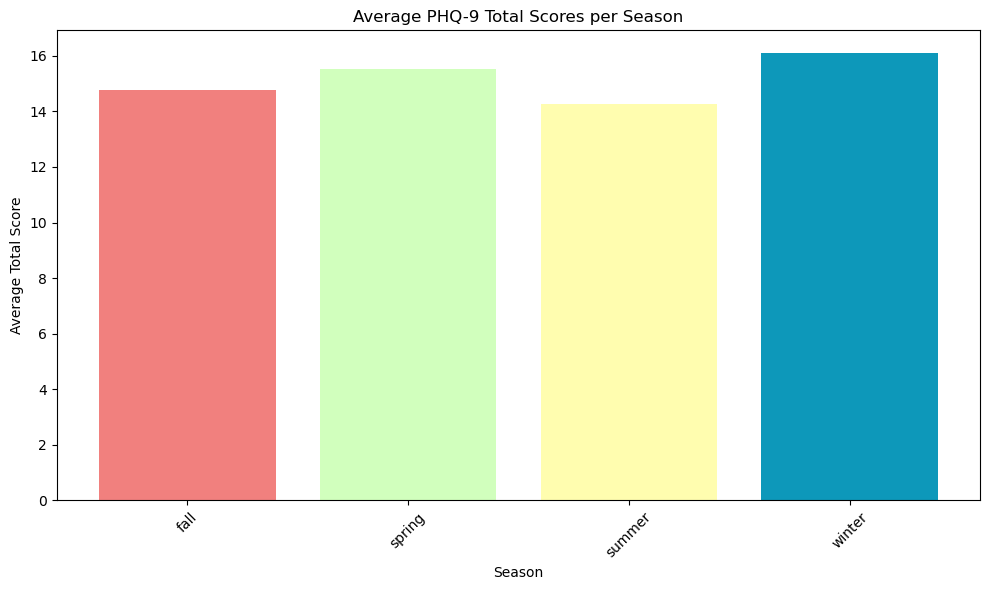

In [86]:
# Plotting the bar graph
plt.figure(figsize=(10,6))
plt.bar(season_scores['season'], season_scores['total.score'], color=['#f1807e', '#D1FFBD', '#fffdaf', '#0D98BA'])
plt.title('Average PHQ-9 Total Scores per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

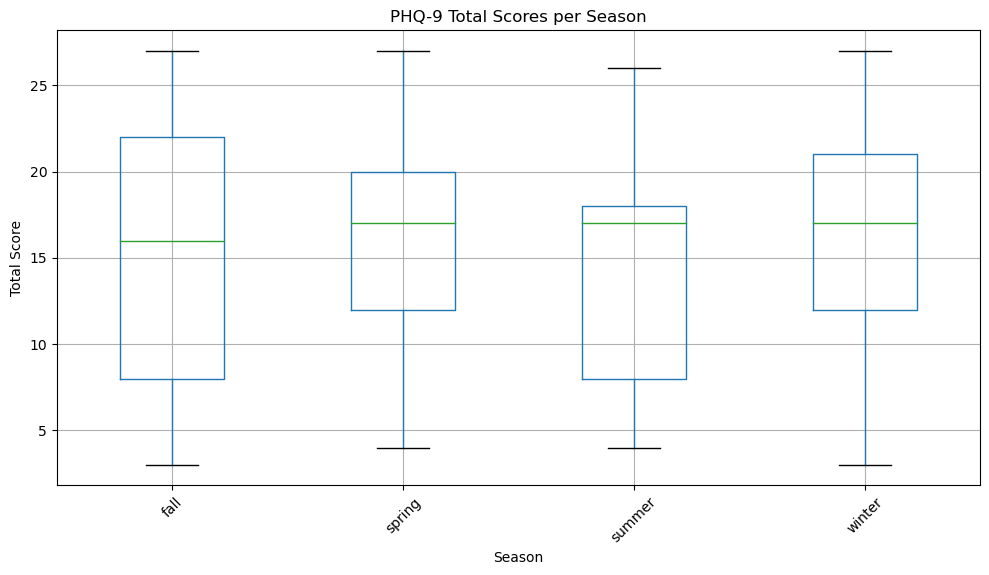

In [87]:
# Plotting the box plot for total scores per season
plt.figure(figsize=(10,6))
total_scores_df.boxplot(column='total.score', by='season', figsize=(10,6))

plt.title('PHQ-9 Total Scores per Season')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by season" title
plt.xlabel('Season')
plt.ylabel('Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [88]:
#statistics grouped by season then user
agg_df = total_scores_df.groupby(['season', 'user_id'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df.head()

season user_id total.score       
                        mean median
0   fall       2        24.0   24.0
1   fall       4        17.0   17.0
2   fall       6        18.0   18.0
3   fall       7        23.0   23.0
4   fall       9         9.0    9.0

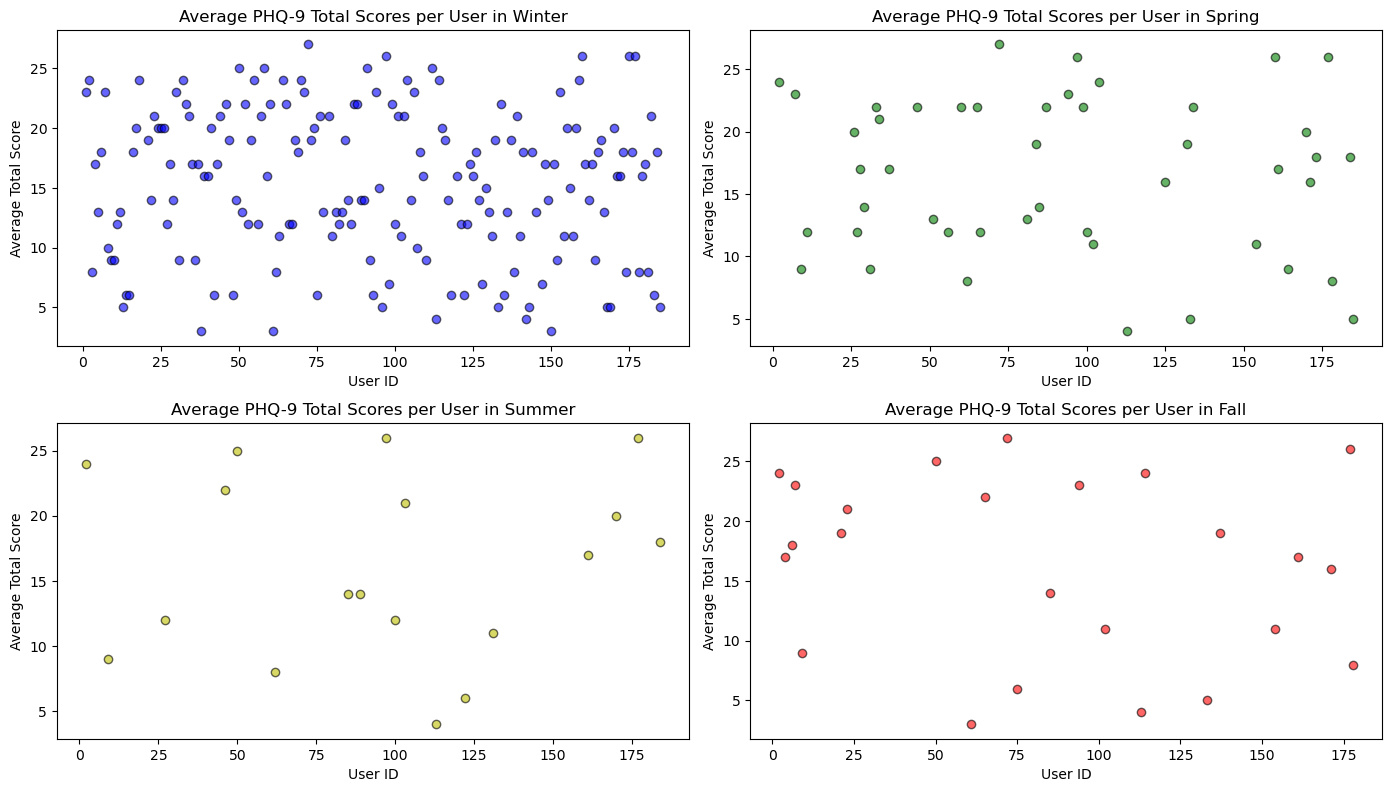

In [89]:
plt.figure(figsize=(14, 8))

#creating a 2x2 plot with 4 subplots
plt.subplot(2, 2, 1)
#scatter plot for winter showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'winter']
plt.scatter(agg_df.loc[agg_df['season'] == 'winter']['user_id'], agg_df.loc[agg_df['season'] == 'winter']['total.score']['mean'],
            alpha=0.6, label=season, color='b', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Winter')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 2)
#scatter plot for spring showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'spring']
plt.scatter(agg_df.loc[agg_df['season'] == 'spring']['user_id'], agg_df.loc[agg_df['season'] == 'spring']['total.score']['mean'],
            alpha=0.6, label=season, color='g', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Spring')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 3)
#scatter plot for summer showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'summer']
plt.scatter(agg_df.loc[agg_df['season'] == 'summer']['user_id'], agg_df.loc[agg_df['season'] == 'summer']['total.score']['mean'],
            alpha=0.6, label=season, color='y', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Summer')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 4)
#scatter plot for fall showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'fall']
plt.scatter(agg_df.loc[agg_df['season'] == 'fall']['user_id'], agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean'], 
            alpha=0.6, label=season, color='r', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Fall')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

#displaying plot
plt.tight_layout(pad=1.0)
plt.show()

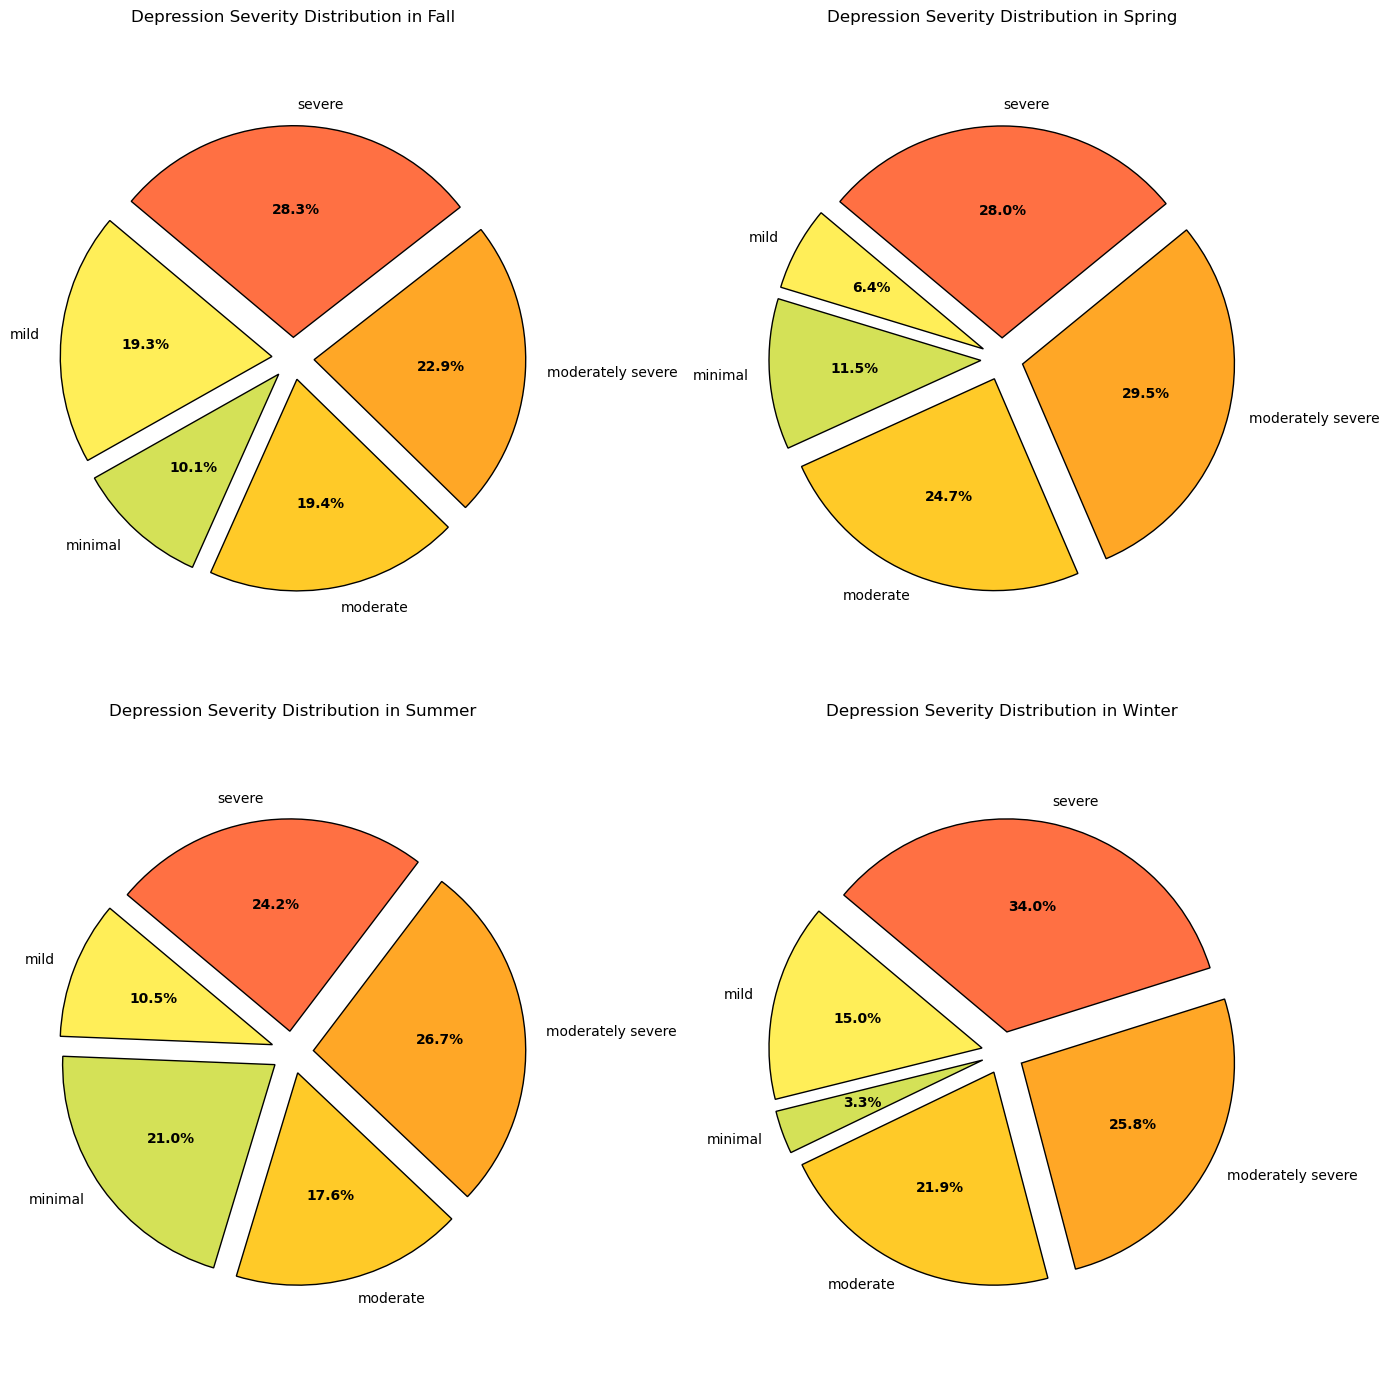

In [90]:
# First, we will count the number of tests taken in each season divided by depression severity
severity_counts_per_season = total_scores_df.groupby('season')['depression.severity'].value_counts().unstack(fill_value=0)

# Define a small gap to separate the pie chart segments
explode_gap = 0.1  # this will separate the slices a little

# Define colors for each severity level, which will be the same across all seasons for consistency
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart with separated segments
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    colors = [severity_colors[severity] for severity in counts.index]
    # Explode all segments a little bit
    explode = [explode_gap] * len(counts)
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

Uniformity Across Seasons: The color coding for each level of depression severity is consistent across all seasons, which aids in comparison. If one severity level is notably more or less prevalent in a particular season, this would be visually apparent.

Severity Distribution: The charts show the proportion of each severity category within each season. By examining the size of the segments, we can make observations such as whether mild depression is more common in winter compared to summer or if there are more severe cases in one season over another.

Seasonal Affective Disorder (SAD): If there is a significant increase in moderate to severe depression during the winter months, it could be indicative of Seasonal Affective Disorder, a type of depression related to changes in seasons. Similarly, if there's a noticeable decrease during brighter months, this might suggest an alleviation of symptoms when there's more sunlight.

Comparison of Extremes: By looking at the 'minimal' and 'severe' categories, we can assess the extremes of the spectrum. A larger 'severe' segment in one season may suggest a need for increased mental health resources during that time.

Data Integrity: The separation of the segments enhances the visibility of smaller categories, which might be overlooked if the segments were not separated. This is particularly useful for identifying the prevalence of more severe categories that may require urgent attention and resources.

Quantitative Analysis: The bold percentages allow for a quick quantitative assessment of each severity category. This can be beneficial for healthcare providers and policymakers to understand the burden of depression in the population and to allocate resources accordingly.

Trends and Patterns: If the same individuals are taking the PHQ-9 across multiple seasons, patterns might emerge that could be indicative of individual or collective trends in mental health, although this would require additional data to confirm.

Need for Further Analysis: While the pie charts provide a snapshot of the distribution of depression severity by season, they do not offer insights into the causes or any correlating factors. A deeper statistical analysis would be required to understand the underlying reasons for the observed distributions.

In conclusion, the visualizations are a starting point for understanding the seasonal variation in depression severity. However, to draw more concrete conclusions, a more detailed statistical analysis including other demographic and environmental factors would be necessary.

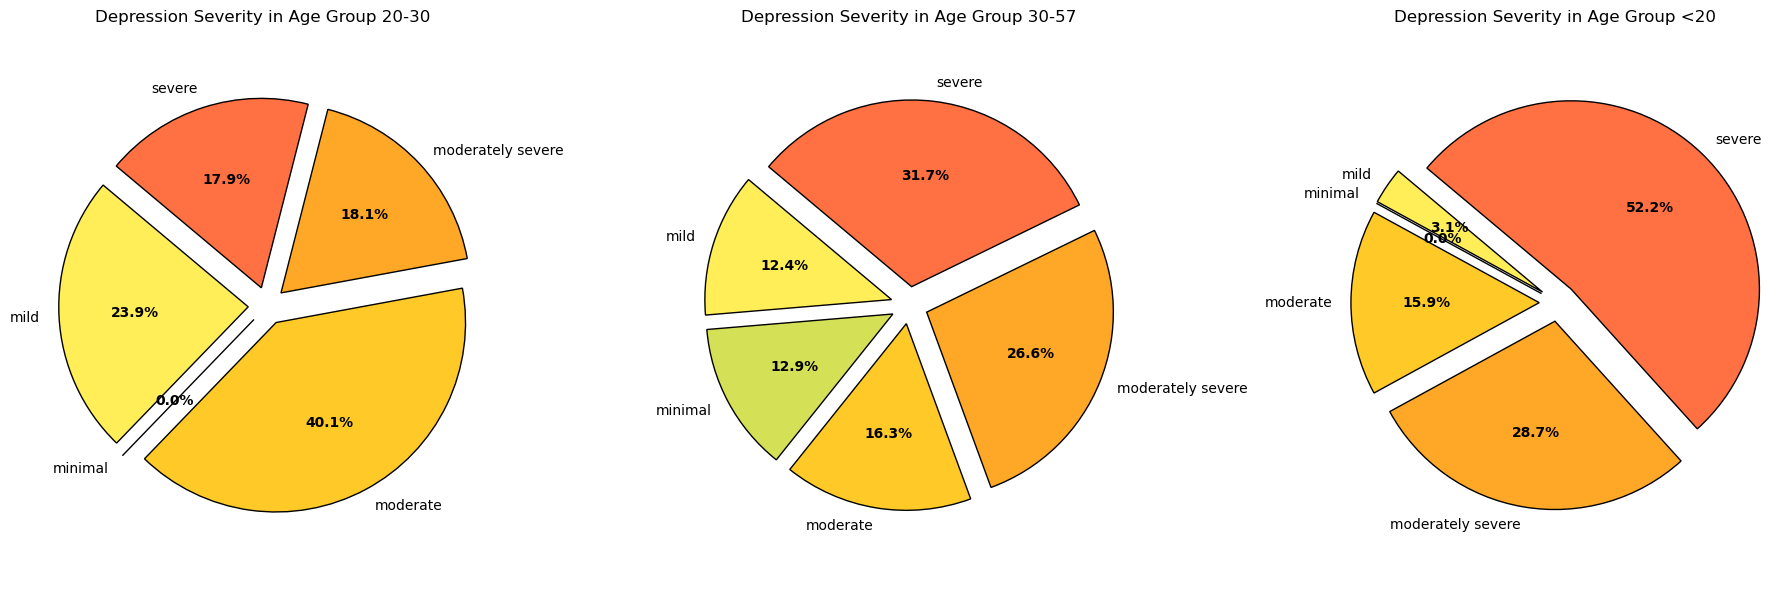

In [91]:
# Define the function to determine depression severity based on the total score
def determine_severity(score):
    if score <= 4:
        return 'minimal'
    elif score <= 9:
        return 'mild'
    elif score <= 14:
        return 'moderate'
    elif score <= 19:
        return 'moderately severe'
    else:
        return 'severe'

# Define the function for age group classification
def age_group(age):
    if age < 20:
        return '<20'
    elif 20 <= age <= 30:
        return '20-30'
    else:
        return '30-57'

# Assuming the total score is the sum of columns from 'phq1' to 'phq9'
score_columns = ['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9']
total_scores_df['total.score'] = total_scores_df[score_columns].sum(axis=1)

# Apply the functions to create the new columns
total_scores_df['depression.severity'] = total_scores_df['total.score'].apply(determine_severity)
total_scores_df['age_group'] = total_scores_df['age'].apply(age_group)

# Group by the age groups and depression severity and count the occurrences
age_severity_counts = total_scores_df.groupby(['age_group', 'depression.severity']).size().unstack(fill_value=0)

# Define the colors for each severity level
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each age group and create a pie chart
for i, age_group in enumerate(age_severity_counts.index):
    ax = axes[i]
    counts = age_severity_counts.loc[age_group]
    colors = [severity_colors[severity] for severity in counts.index]
    explode = [0.1] * len(counts)  # explode all slices for emphasis
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity in Age Group {age_group}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

In [92]:
agg_df_gender = total_scores_df.groupby(['season', 'sex'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_gender

season          sex total.score       
                               mean median
0     fall       female   17.036606   17.0
1     fall         male   13.727823   11.0
2     fall  transgender    8.000000    8.0
3   spring       female   17.469557   17.0
4   spring         male   12.469919   11.0
5   spring  transgender    8.000000    8.0
6   summer       female   17.559524   17.0
7   summer         male    9.003333    4.0
8   winter       female   16.860808   18.0
9   winter         male   14.545788   16.0
10  winter  transgender    8.000000    8.0

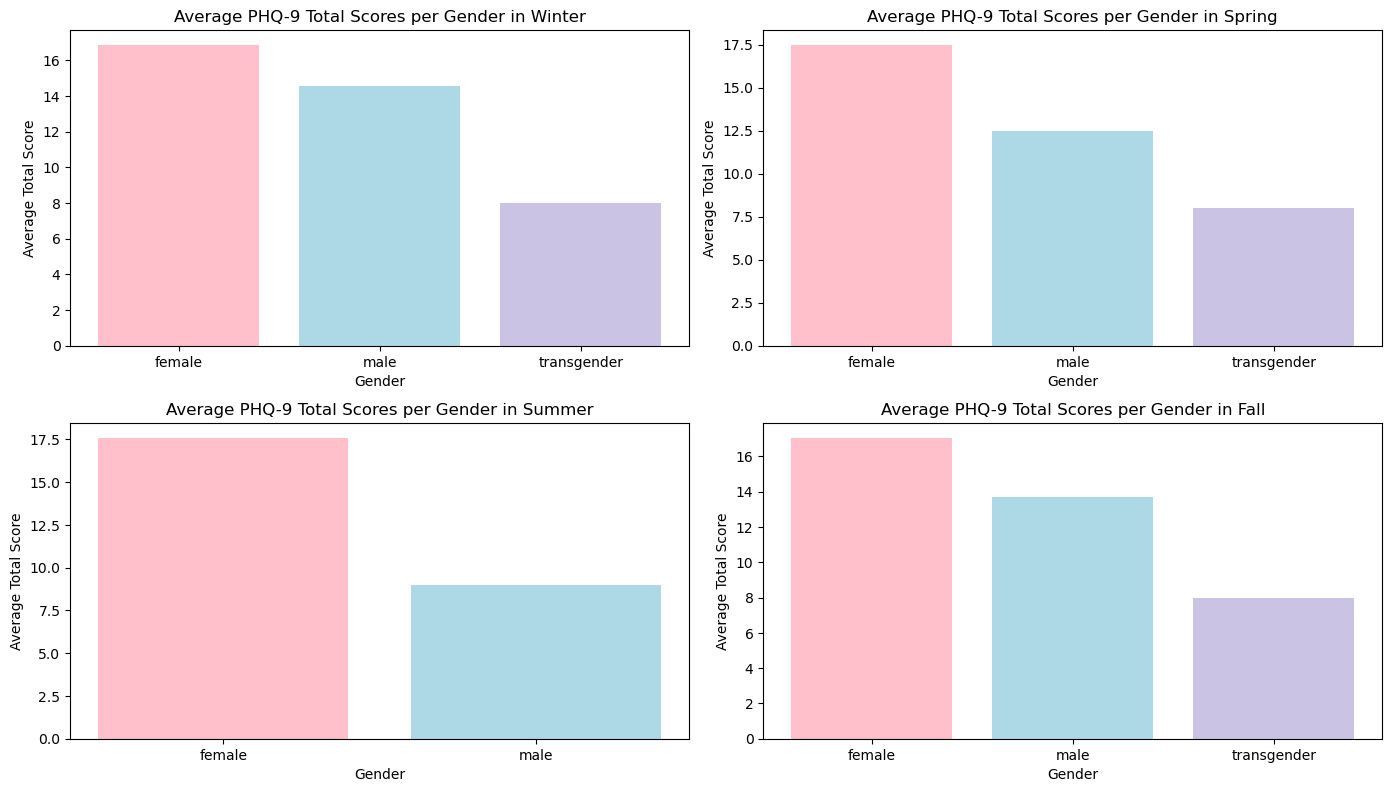

In [93]:
plt.figure(figsize=(14, 8))

#creating a 2x2 plot with 4 subplots
plt.subplot(2, 2, 1)
#bar plot for winter showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'winter']['sex'], 
        agg_df_gender.loc[agg_df_gender['season'] == 'winter']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Winter')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 2)
#bar plot for spring showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'spring']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'spring']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Spring')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 3)
#bar plot for summer showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'summer']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'summer']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Summer')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 4)
#bar plot for fall showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'fall']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'fall']['total.score']['mean'], 
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Fall')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

#displaying plot
plt.tight_layout(pad=1.0)
plt.show()

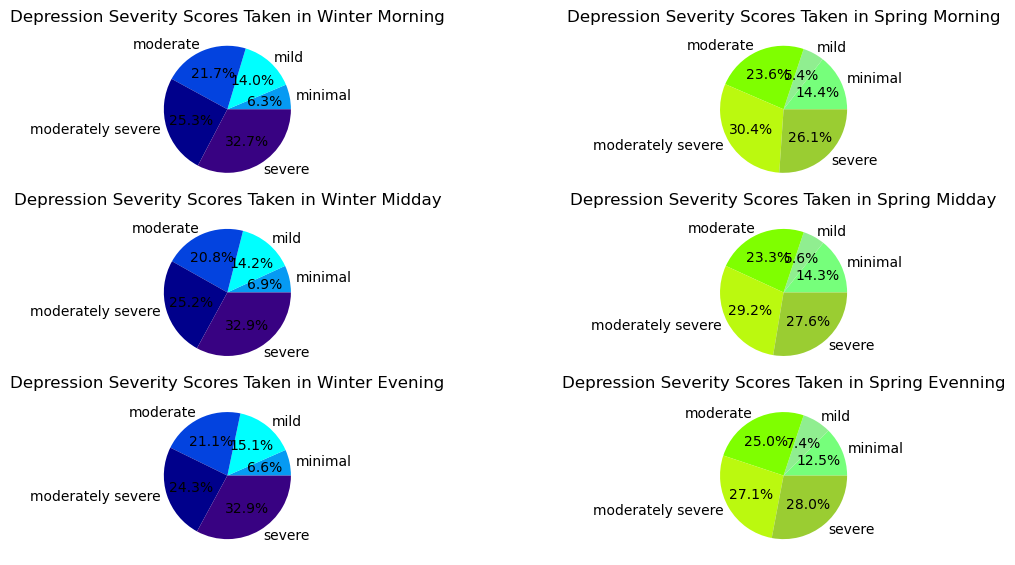

In [94]:
Daytime_counts_per_season = total_scores_df.groupby('period.name')['depression.severity'].value_counts().unstack(fill_value=0)
# Define a small gap to separate the pie chart segments
explode_gap = 0.1  # this will separate the slices a little

# Define colors for each severity level, which will be the same across all seasons for consistency (winter)
severity_colors = {
    'minimal': '#00ffff',
    'mild': '#069af3',
    'moderate': '#0343df',
    'moderately severe': '#00008b',
    'severe': '#380282'}

severitya = ['minimal','mild', 'moderate', 'moderately severe', 'severe']
counta = []
plt. subplot (3, 2, 1)
for x in severitya:
    counta.append(total_scores_df.loc[(total_scores_df['period.name'] == 'morning') & (total_scores_df['season'] == 'winter') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colors[severity] for severity in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(counta, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Winter Morning')

countb = []
plt. subplot (3, 2, 3)
for x in severitya:
    countb.append(total_scores_df.loc[(total_scores_df['period.name'] == 'midday') & (total_scores_df['season'] == 'winter') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colors[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countb, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Winter Midday')

countc = []
plt. subplot (3, 2, 5)
for x in severitya:
    countc.append(total_scores_df.loc[(total_scores_df['period.name'] == 'evening') & (total_scores_df['season'] == 'winter') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colors[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countc, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Winter Evening')

# Define colors for each severity level, which will be the same across all seasons for consistency (spring)
severity_colorsb = {
    'minimal': '#90ee90',
    'mild': '#76ff7b',
    'moderate': '#7fff00',
    'moderately severe': '#bbf90f',
    'severe': '#9acd32'}

countg = []
plt. subplot (3, 2, 2)
for x in severitya:
    countg.append(total_scores_df.loc[(total_scores_df['period.name'] == 'morning') & (total_scores_df['season'] == 'spring') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsb[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countg, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Spring Morning')

counth = []
plt. subplot (3, 2, 4)
for x in severitya:
    counth.append(total_scores_df.loc[(total_scores_df['period.name'] == 'midday') & (total_scores_df['season'] == 'spring') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsb[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(counth, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Spring Midday')

counti = []
plt. subplot (3, 2, 6)
for x in severitya:
    counti.append(total_scores_df.loc[(total_scores_df['period.name'] == 'evening') & (total_scores_df['season'] == 'spring') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsb[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(counti, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Spring Evenning')

# Adjust the layout so there's no overlap and show the plots
plt.tight_layout(pad=-5,w_pad=25)
plt.show()

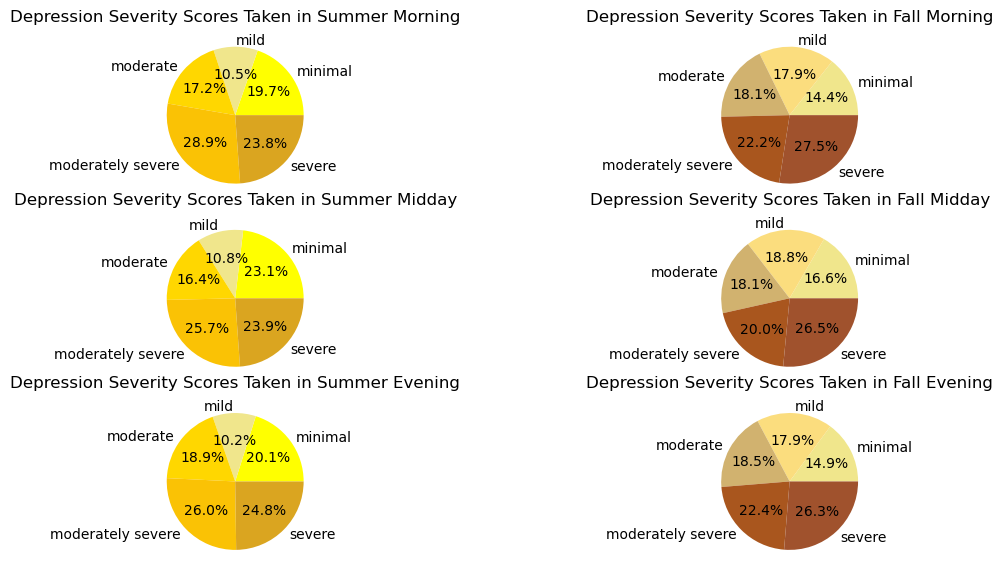

In [95]:
# Define colors for each severity level, which will be the same across all seasons for consistency (summer)
severity_colorsa = {
    'minimal': '#f0e68c',
    'mild': '#ffff00',
    'moderate': '#ffd700',
    'moderately severe': '#fac205',
    'severe': '#daa520'}

countd = []
plt. subplot (3, 2, 1)
for x in severitya:
    countd.append(total_scores_df.loc[(total_scores_df['period.name'] == 'morning') & (total_scores_df['season'] == 'summer') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsa[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countd, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Summer Morning')

counte = []
plt. subplot (3, 2, 3)
for x in severitya:
    counte.append(total_scores_df.loc[(total_scores_df['period.name'] == 'midday') & (total_scores_df['season'] == 'summer') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsa[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(counte, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Summer Midday')

countf = []
plt. subplot (3, 2, 5)
for x in severitya:
    countf.append(total_scores_df.loc[(total_scores_df['period.name'] == 'evening') & (total_scores_df['season'] == 'summer') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsa[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countf, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Summer Evening')

# Define colors for each severity level, which will be the same across all seasons for consistency (fall)
severity_colorsc = {
    'minimal': '#fbdd7e',
    'mild': '#f0e68c',
    'moderate': '#d1b26f',
    'moderately severe': '#a9561e',
    'severe': '#a0522d'}

countj = []
plt. subplot (3, 2, 2)
for x in severitya:
    countj.append(total_scores_df.loc[(total_scores_df['period.name'] == 'morning') & (total_scores_df['season'] == 'fall') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsc[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countj, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Fall Morning')

countk = []
plt. subplot (3, 2, 4)
for x in severitya:
    countk.append(total_scores_df.loc[(total_scores_df['period.name'] == 'midday') & (total_scores_df['season'] == 'fall') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsc[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countk, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Fall Midday')

countl = []
plt. subplot (3, 2, 6)
for x in severitya:
    countl.append(total_scores_df.loc[(total_scores_df['period.name'] == 'evening') & (total_scores_df['season'] == 'fall') &(total_scores_df['depression.severity'] == x)]['depression.severity'].count())
    colors = [severity_colorsc[severitya] for severitya in counts.index]
    for autotext in autotexts:
        autotext.set_weight('bold')
plt.pie(countl, labels=severitya, autopct='%1.1f%%' , colors=colors)
plt.title('Depression Severity Scores Taken in Fall Evening')

# Adjust the layout so there's no overlap and show the plots
plt.tight_layout(pad=-5,w_pad=25)
plt.show()